In [1]:
from os import path
from apsfinal.tables import ContigencyAgent
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

### Step 1: Set initial variables and initialize agent

In [2]:
csv_in = path.join('..', 'data', 'healthcare-dataset-stroke-data-cleanbmi.csv')  # Here, you can change the path you want
agent = ContigencyAgent(csv_in)

### Step 2: Assign feature1 and feature2

In [3]:
# All feature names: gender, age, hypertension, heart_disease, ever_married, work_type,
#                    Residence_type, avg_glucose_level, bmi, smoking_status, stroke

In [4]:
feature1 = 'stroke' # top: stroke
feature2 = 'bmi' # left: age, age_detail, work_type, avg_glucose_level, bmi

### Step 3: Show Table

In [7]:
data_array = agent.show_contingency_table(feature1, feature2)

╒══════════════╤════════╤═══════════╤═══════════╕
│              │ Stroke │ No Stroke │ Row Total │
├──────────────┼────────┼───────────┼───────────┤
│ Underweight  │ 1      │ 48        │ 49        │
├──────────────┼────────┼───────────┼───────────┤
│ Normal       │ 29     │ 717       │ 746       │
├──────────────┼────────┼───────────┼───────────┤
│ Overweight   │ 45     │ 636       │ 681       │
├──────────────┼────────┼───────────┼───────────┤
│ Column Total │ 75     │ 1401      │ 1476      │
╘══════════════╧════════╧═══════════╧═══════════╛
X-square=6.43, df=2, p-value=4.006e-02


In [6]:
data_array = agent.show_contingency_table_include_expected_values(feature1, feature2)

╒══════════════╤═══════════╤═════════════╤═══════════╕
│              │ Stroke    │ No Stroke   │ Row Total │
├──────────────┼───────────┼─────────────┼───────────┤
│ Underweight  │ 1 (2.5)   │ 48 (46.5)   │ 49        │
├──────────────┼───────────┼─────────────┼───────────┤
│ Normal       │ 29 (37.9) │ 717 (708.1) │ 746       │
├──────────────┼───────────┼─────────────┼───────────┤
│ Overweight   │ 45 (34.6) │ 636 (646.4) │ 681       │
├──────────────┼───────────┼─────────────┼───────────┤
│ Column Total │ 75        │ 1401        │ 1476      │
╘══════════════╧═══════════╧═════════════╧═══════════╛
X-square=6.43, df=2, p-value=4.006e-02


In [8]:
x_array = np.array(range(3))
denominator = data_array[1:-1,3]
numerator = data_array[1:-1,1]
y_array = numerator / denominator

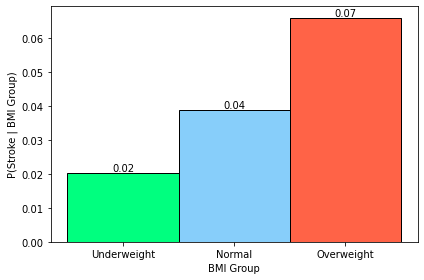

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

width = 1

ax.bar(x_array[0], y_array[0], width,edgecolor="black", color="springgreen")
ax.bar(x_array[1], y_array[1], width,edgecolor="black", color="lightskyblue")
ax.bar(x_array[2], y_array[2], width,edgecolor="black", color="tomato")

#ax.set_xticks([45, 55, 65, 75, 85])
ax.set_ylabel("P(Stroke | BMI Group)")
ax.set_xlabel("BMI Group")
ax.set_xticks(x_array)
ax.set_xticklabels(['Underweight', 'Normal', 'Overweight'])

for x,y in zip(x_array, y_array):
    text_str = f'{y:.2f}'
    ax.text(x-0.1, y+0.0005, text_str)

plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/BMI_condition_prob.svg")
plt.show()

In [14]:
x_array = np.array(range(4))
denominator = data_array[1:-1,3]
numerator = data_array[1:-1,1]
y_array = numerator / denominator

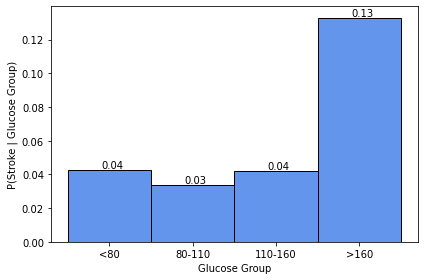

In [28]:
fig, ax = plt.subplots(figsize=(6,4))

width = 1
ax.bar(x_array, y_array, width,edgecolor="black", color="cornflowerblue")
#ax.set_xticks([45, 55, 65, 75, 85])
ax.set_ylabel("P(Stroke | Glucose Group)")
ax.set_xlabel("Glucose Group")
ax.set_xticks(x_array)
ax.set_xticklabels(["<80", "80-110", "110-160", ">160"])

for x,y in zip(x_array, y_array):
    text_str = f'{y:.2f}'
    ax.text(x-0.1, y+0.001, text_str)

plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/glucose_condition_prob.svg")
plt.show()

In [22]:
x_array = np.array(range(15,86,10))
denominator = data_array[1:-1,3]
numerator = data_array[1:-1,1]
y_array = numerator / denominator

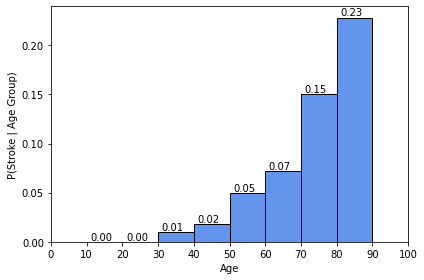

In [36]:
fig, ax = plt.subplots(figsize=(6,4))

width = 10
ax.bar(x_array, y_array, width,edgecolor="black", color="cornflowerblue")
ax.set_xticks(range(0,101,10))
ax.set_ylabel("P(Stroke | Age Group)")
ax.set_xlabel("Age")
for x,y in zip(x_array, y_array):
    text_str = f'{y:.2f}'
    ax.text(x-4, y+0.002, text_str)

plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/age_condition_prob.svg")
plt.show()

In [40]:
x_array = np.array(range(45,86,10))
denominator = data_array[1:-1,3]
numerator = data_array[1:-1,1]
y_array = numerator / denominator

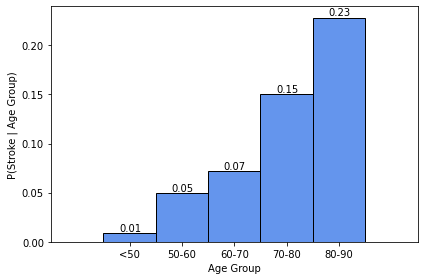

In [50]:
fig, ax = plt.subplots(figsize=(6,4))

width = 10
ax.bar(x_array, y_array, width,edgecolor="black", color="cornflowerblue")
ax.set_xticks([45, 55, 65, 75, 85])
ax.set_ylabel("P(Stroke | Age Group)")
ax.set_xlabel("Age Group")
ax.set_xlim(30,100)
for x,y in zip(x_array, y_array):
    text_str = f'{y:.2f}'
    ax.text(x-2, y+0.002, text_str)
ax.set_xticklabels(["<50", "50-60", "60-70", "70-80", "80-90"])


plt.tight_layout()
#plt.savefig("/home/yizaochen/Desktop/drawzone_temp/aps/age_condition_prob2.svg")
plt.show()

### Step 4: $\chi^2$ test

In [17]:
obs_list = list()
for col_id in range(len(['Stroke', 'No Stroke'])):
    obs_list.append(data_array[1:-1, col_id+1])
obs_array = np.array(obs_list)
obs_array

array([[20, 48, 47, 94, 40],
       [2880, 786, 574, 475, 146]], dtype=object)

In [18]:
chi2_contingency(obs_array, correction=False)

(398.14772290638064,
 6.990541750848635e-85,
 4,
 array([[ 141.3111546 ,   40.63913894,   30.26007828,   27.72622309,
            9.06340509],
        [2758.6888454 ,  793.36086106,  590.73992172,  541.27377691,
          176.93659491]]))

In [9]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
chi2, p, dof, ex = chi2_contingency(obs)